# 3. 팩터 투자와 자산 가격 결정 이상 현상

자산 가격 결정 이상 현상 : 팩터투자의 기본 토대
- 대표 학술 저널 : Journal of Finance / Review of Financial Studies / Journal of Financial Economics
- 실무자 저널 : JOurnal of Portfolio Management / Financial Analysts Journal
팩터 모델의 핵심 목표 : 자산 가격의 동인 이해하기
- 팩터 투자의 논리: 기업의 재무 성과가 팩터에 의존한다 -> 팩터: 잠재적&관찰 불가능 or 회계 비율 같은 내재적 특성과 관련됨
"어떤 특성이 평균 수익률에 대한 독립적인 정보를 실질적으로 제공하는가?"

선형 팩터 모델 : 자산 n의 수익률을 기저에 존재하는 팩터들 $f_k$의 선형 결합으로 모델링할 수 있다고 가정한 APT(차익 거래 가격 결정 이론)의 특수한 경우
$\\r_{t,n}=\alpha_n+\sum^K_{k=1}\beta_{n,k}f_{t,k}+\epsilon_{t,n}$
$\\s.t. E[\epsilon_{t,n}]=0,\ cov(\epsilon_{t,n},\epsilon_{t,m})=0\ for\ n!=m.\ cov(f_n,\epsilon_n)=0$

=> 만약 이런 팩터들이 존재한다면 CAPM은 모순임 -> CAPM : 수익률의 유일한 동인이 시장 포트폴리오라고 주장함(그래서 팩터를 '이상 현상'이라고 하는 거)
=> 이 수식은 (i)일회성(비조건부) (ii)시간 프레임에 걸쳐 순차적 평가(매개 변수 변함-조건부)
(ii) : 자산가격의 동인이 일정하지 않을 수 있다는 점을 인정하기 때문에 더 유연하며 합리적인 가정으로 보임

[3.2.2] 단순 포트폴리오 정렬 (가장 general 절차)
1. 특정 기준(ex. 시가 총액, 가격 대비 장부가 비율)에 따라 기업 순위 매김
2. 순위에 따라 동일한 개수의 주식으로 구성된 j개의 포트폴리오(: 동질적 그룹)를 구성함
3. 포트폴리오 내의 주식 가중치는 균등하거나 시가총액에 비례함
4. 미래 날짜(usually 1개월)에 포트폴리오의 수익률 보고 -> 샘플의 가장 마지막 날짜에 도달할 때까지 절차 반복
- 결과 : 각 그룹 j에 대한 포트폴리오 수익률 $r^j_t$의 시계열
=> j=1 과 j=J 사이의 t-검정에서 평균 수익률에 유의미한 차이 발견되면 이상 현상으로 간주 !
- 한계 : 정렬 기준이 수익률에 단조적이지 않은 영향을 미칠 수 있음
=> 시가총액과 시장가 대비 장부가 비율 결합 -> if 각 특성을 10개 버킷으로 => 총 100개의 포트폴리오 만들어짐

In [ ]:
import import_ipynb
from Ch1 import data_ml

In [2]:
df_median=[]
df=[]
# 중위값 계산
df_median=data_ml[['date','Mkt_Cap_12M_Usd']].groupby(
    ['date']).median().reset_index()

In [3]:
type(df_median)

pandas.core.frame.DataFrame

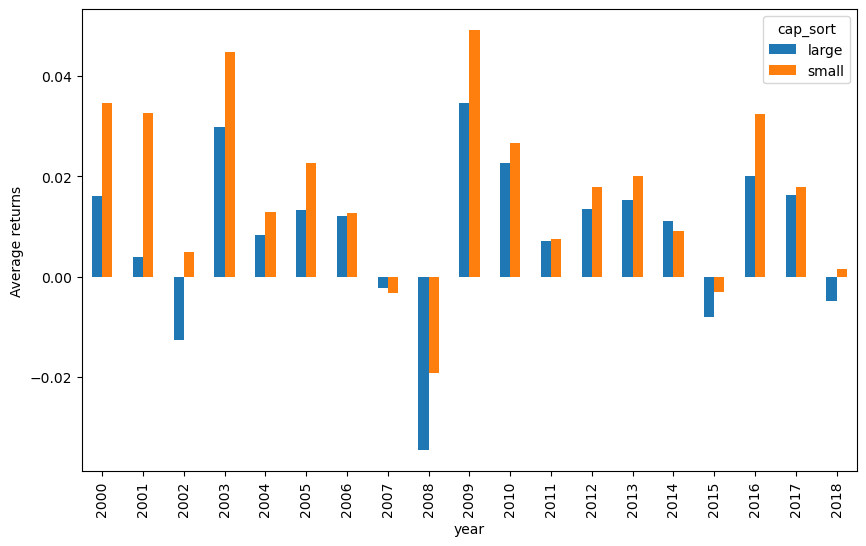

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_median.rename(columns={'Mkt_Cap_12M_Usd':'cap_median'},inplace=True)
df=pd.merge(data_ml[['date','Mkt_Cap_12M_Usd','R1M_Usd']],df_median,how='left',on=['date'])
# 연도 및 시가 총액 로직 설정해서 그룹화하기
df=df.groupby([pd.to_datetime(df['date']).dt.year,np.where(
    df['Mkt_Cap_12M_Usd']>df['cap_median'],'large','small')])['R1M_Usd'].mean().reset_index()
df.rename(columns={'level_1':'cap_sort'},inplace=True)
# pivot : 데이터 구조 변경
df.pivot(index='date',columns='cap_sort',values='R1M_Usd').plot.bar(figsize=(10,6))
plt.ylabel('Average returns')
plt.xlabel('year')
df_median=[]
df=[]

=> 사이즈 팩터 포트폴리오 -> 시가 총액 중앙값 이하인 기업은 평균적으로 더 높은 수익을 얻음

[3.2.3] 팩터들
팩터를 만드는 건 위와 동일한 맥락을 따름
어떤 한 가지 특성을 기반으로 하며 팩터는 하나의 극단적인 포트폴리오에서 반대되는 극단적인 포트폴리오를 뺀 롱숏 앙상블(:집합을 의미)임
=> Long - Short : 하나는 사고 하나는 팔아서 포트폴리오 구성하면 시장 전체가 오르고 내리는 Market Risk를 Hedge(제거)할 수 있음
-> Regardless of Marktet Moving, {가치주(저평가) > 성장주(고평가)} 라는 순수한 팩터의 효과(Premium)만을 측정할 수 있음
1. 사이즈 : (소형주) - (대형주)
2. 밸류 : (가치주) - (성장주)
3. 모멘텀 : (승자주) - (패자주) ~ 지난 1년간 잘 나갔던 주식이 앞으로도 당분간 잘 나감
- 승자주 : 작년 동안 가장 높은 수익률을 기록했던 자산
+ 모멘텀 : 더 높은 or 더 낮은 빈도에서 발생하는 반대 움직임과도 관련 있음
4. 수익성 : (견고한 수익성) - (약한 수익성)
- 수익성 =  (매출 - (비용 및 경비))/자본
5. 투자 : (보수적 투자) - (공격적 투자)
- 투자 = (전체 자산 성장)/(자산 총량)
6. 저위험 : sometimes, 베타에 대한 베팅
- 연구마다 단순 변동성 / 시장 베타 / 고유 변동성 등 위험을 측적하는 방법이 다름

In [ ]:
# 이거 이미 했음 !! 그만 !
import urllib.request
min_date=196307
max_date=202003
# 다운로드할 url 생성
ff_url="https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp"
ff_url+="/F-F_Research_Data_5_Factors_2x3_CSV.zip"
# 다운로드
urllib.request.urlretrieve(ff_url,'factors.zip')

('factors.zip', <http.client.HTTPMessage at 0x2431b941e50>)

In [7]:
import pandas as pd
df_ff=pd.read_csv('factors/F-F_Research_Data_5_Factors_2x3.csv', header=3, sep=',',quotechar='"')
df_ff.rename(columns={'Unnamed: 0':'date'},inplace=True)
df_ff.rename(columns={'Mkt-RF':'MKT_RF'},inplace=True)
# 수익률 스케일링
factors=['MKT_RF','SMB','HML','RMW','CMA','RF']
df_ff=df_ff.apply(pd.to_numeric,errors='coerce')
df_ff[factors]=df_ff[factors]/100.0
idx_ff=df_ff.index[(df_ff['date']>=min_date)&(df_ff['date']<=max_date)].tolist()
FF_factors=df_ff.iloc[idx_ff].copy()
FF_factors['year']=FF_factors.date.astype(str).str[:4]

이러한 팩터들(롱-숏 포트폴리오)은 시간 가변적이며, 기업 뉴스 및 실적 발표에 의해 확대되는 경향이 있음 but 장기적으로 양의 수익률을 제공한다는 사실은 널리 문서화돼 있음
+ 수익률의 예측 가능성 또한 시간 가변적임

Text(0.5, 0, 'date')

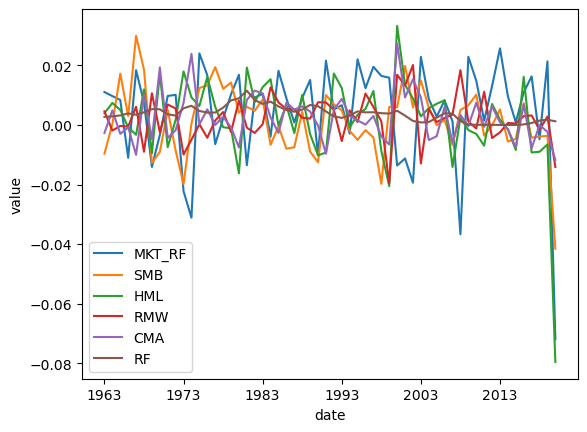

In [8]:
# 연도 및 시가 총액 로직 설정해 그룹화
FF_factors.iloc[:,1:7].groupby(FF_factors['year']).mean().plot()
plt.ylabel('value')
plt.xlabel('date')

=> 데이터 : 'Fama-French 5 Factor Model'
-> 주식시장의 수익률이 어디서 왔는지를 5가지 원인(Factor)로 쪼개 놓은 성적표
-> 각 팩터로 Long-Short 취했을 때 수익률
(Ex) 내가 만든 전략의 수익률이 특정 Factor(Ex.밸류)와 상관관계 매우 높음 -> 그냥 가치주 투자를 한 거임
- 특정 팩터에 대해 자산 배분을 수행하는 투자자의 개별적 특성이 최근 주요 주제임
- 어떤 이상 현상을 '진정한' 팩터라고 부르기 위해서는 보다 높은 기준을 설정해야 함
=> p-값에 대한 임계치를 높이는 것이 부분적인 해답

[통계 검정 in Portfolio 정렬]
(ex) 수익률 높 vs 낮
- 각 포트폴리오 수익률: $r^+_t$, $r^-_t$
- 검정 통계량 $t=\sqrt{T}\frac{m_{r^+}-m_{r^-}}{\sigma_{r_+-r_-}}\\$
=> 포트폴리오 수익률의 평균값 $\\$
=> 표준편차: 롱숏 포트폴리오의 변동성
-> 즉 t-통계량 = 조정된 샤프비율
- $p-값=P[D|H]$
- $\\목표확률=P[H|D]=\frac{P[D|H]}{P[D]}\times P[H]$

[베이지안화된 p-값]
$Bpv=e^{-t^2/2}\times \frac{prior}{1+e^{-t^2/2}\times prior}$
- $t$: 회귀식 통해 얻은 t통계량
- $prior$: 가설(이상 현상-유의미한 차이)이 참일 확률
- 귀무가설: 이 Factor가 가짜일 확률(Null H가 참)이 p%이다

[파마-맥베스 회귀]
: 위험 프리미엄에 대한 2단계 회귀 분석
1. $\\r_{t,n}=\alpha_n+\sum^K_{k=1}\beta_{n,k}f_{t,k}+\epsilon_{t,n}\\$
이론적으로 베타 알 수 있음
2. $r_{t,n}=\gamma_{t,0}+\sum^K_{k=1}\gamma_{t,k}\hat{\beta_{n,k}}+\epsilon_{t,n}\\$
$\beta_{n,k}$에 대한 회귀 -> $\hat{\gamma_{t,k}}$: t시점에서 팩터 k의 프리미엄 추정
3. 해당 프리미엄의 유의미 여부: $t_k=\frac{\hat{\gamma_k}}{\hat{\sigma_k}/\sqrt{T}}$: 각 팩터가 유의미한지 평가하기 위함

In [9]:
from pandas.tseries.offsets import MonthEnd #해당 날짜가 속한 달의 마지막 날
# returns: 주요 종목들의 수익률 행렬(R1M Usd)
from Ch1 import returns
stock_list=list(returns.columns) # 주요 종목 id 리스트로 저장
FF_factors['date']=pd.to_datetime(
    FF_factors['date'],format='%Y%m')+MonthEnd(0) # 수익률 데이터가 월말 기준이기 때문
FF_factors['date']=FF_factors['date'].dt.date # '날짜'만 남김
FF_factors['date']=FF_factors['date'].astype(str) # 최종 날짜를 str(****-**-**)로 변환
data_FM=pd.merge(returns.iloc[:,0].reset_index(),FF_factors.iloc[:,0:7],how='left',on=['date'])
data=FF_factors
data_FM.dropna(inplace=True) # 특정 날짜에 주가 수익률은 있는데 팩터 데이터 없는 경우 제거

reset_index() : index 항목을 column으로 꺼내줌

In [10]:
# 1단계 회귀
import statsmodels.api as sm
results_params=[]
reg_result=[]
df_res_full=[]
for i in range(len(returns.columns)):
    Y=returns.iloc[:,i].shift(-1).reset_index()
    Y=Y.drop(columns=['date']) # 한 칸 올렸으니까
    Y.dropna(inplace=True)
    results=sm.OLS(endog=Y,exog=sm.add_constant(data_FM.iloc[0:227,2:7])).fit()
    results_params=results.params
    reg_result_tmp=pd.DataFrame(results_params) # 각 종목마다 update됨
    reg_result_tmp['stock_id']=stock_list[i]
    df_res_full.append(reg_result_tmp) # 모든 종목 담는 리스트
df_res_full=pd.concat(df_res_full)
df_res_full.reset_index(inplace=True)
df_res_full.rename(columns={'index':'factors_name',0:'betas'},inplace=True)
df_res_full_mat=df_res_full.pivot(index='stock_id',columns='factors_name',values='betas')
column_names_inverted=['const','MKT_RF','SMB','HML','RMW','CMA']
reg_result=df_res_full_mat.reindex(columns=column_names_inverted)

In [11]:
# 2단계 회귀
returns_trsp=returns.transpose()
df_2nd_pass=pd.concat([reg_result.iloc[:,1:6],returns.transpose()],axis=1)

In [13]:
betas=df_2nd_pass.iloc[:,0:5]
date_list=list(returns_trsp.columns)
results_params=[]
reg_result=[]
df_res_full=[]
for j in range(len(date_list)):
    Y=returns_trsp.iloc[:,j] # 각 날짜에 대한 모든 종목 수익률
    results=sm.OLS(endog=Y,exog=sm.add_constant(betas)).fit()
    results_params=results.params
    reg_result_tmp=pd.DataFrame(results_params)
    reg_result_tmp['date']=date_list[j]
    df_res_full.append(reg_result_tmp)

df_res_full=pd.concat(df_res_full)
df_res_full.reset_index(inplace=True)
gammas=df_res_full

gammas.rename(columns={'index':'factors_name',0:'betas'},inplace=True)
gammas_mat=gammas.pivot(index='date',columns='factors_name',values='betas')
column_names_inverted=['const','MKT_RF','SMB','HML','RMW','CMA']
gammas_mat=gammas_mat.reindex(columns=column_names_inverted)



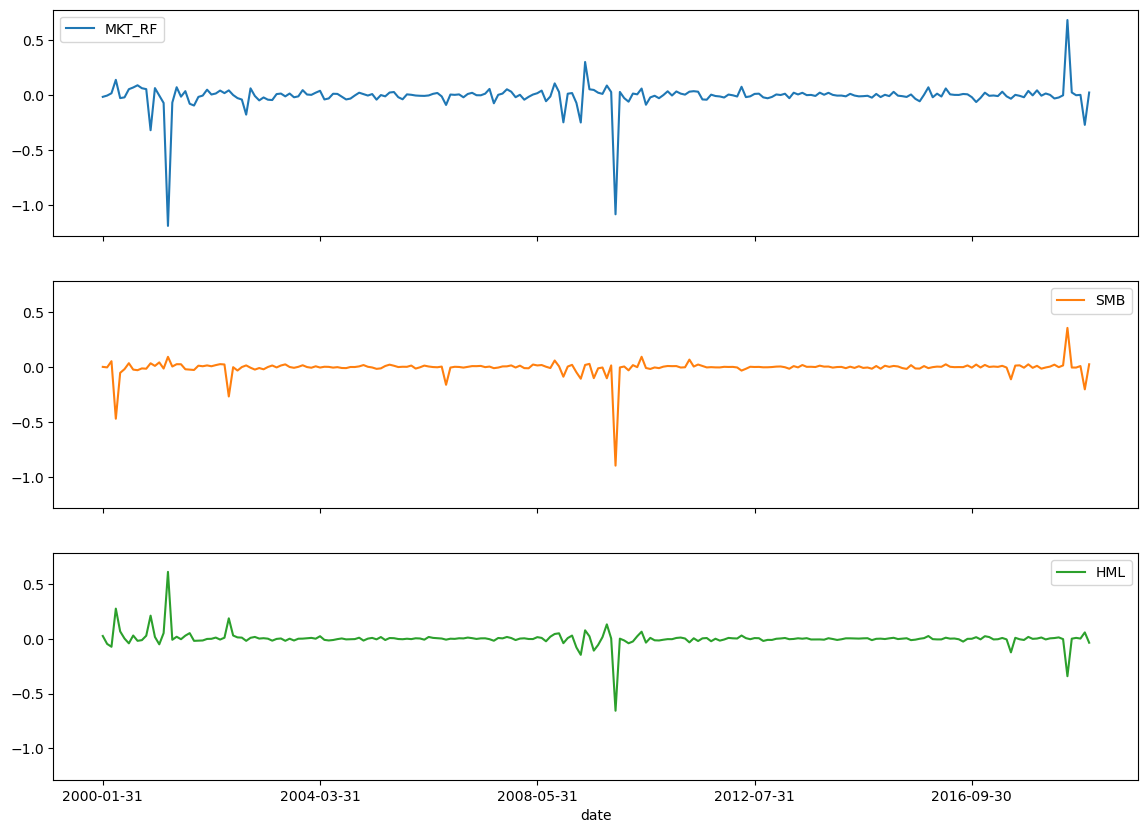

In [16]:
gammas_mat.iloc[:,1:4].plot(figsize=(14,10),subplots=True,sharey=True,sharex=True)
plt.show()

[3.2.5 팩터 경쟁]
- 팩터의 핵심 목적: 주식의 횡단면 수익률 설명하기 ~ 이론적/실무적 이유로 팩터 간 중복성 피하는 것이 바람직함
- 중복성: 추정치를 교란하는 공선성을 암시함
- 팩터 간 오버랩(높은 절대적 상관관계): 해석성이 떨어지는 익스포저(계수) 산출 (양수, 음수는 서로를 가성적으로 보상함)
$\\$ => Solution: 직교화 / 변수 선택 및 통합 / 규제화 회귀

- 중복 팩터 걸러내기: 각 팩터를 다른 모든 팩터와 비교해 회귀 분석 실행함
$\\ f_{t,k}=a_k+\sum_{j!=k}\delta_{k,j}f_{t,j}+\epsilon_{t,k}\\$
$a_k$가 -과 크게 다르면 다른 팩터들의 횡단면이 팩터 k의 평균 수익률을 완전히 설명하지 못함(중복성 낮)
$\\$ 횡단면: 시간 고정 + 그 시점의 여러 대상 동시에 비교

In [17]:
# 팩터 중복성 결정하는 회귀 분석
df_res_full=[]
for i in range(0,5):
    factors_list_full=['MKT_RF','SMB','HML','RMW','CMA']
    factors_list_tmp=factors_list_full
    Y=FF_factors[factors_list_full[i]]
    factors_list_tmp.remove(factors_list_full[i]) # 자신은 지우기
    data=FF_factors[factors_list_tmp] # 나머지 팩터들의 수익률
    results=sm.OLS(endog=Y,exog=sm.add_constant(data)).fit()
    results_param=results.params
    reg_result_tmp=pd.DataFrame(results_param)
    reg_result_tmp['factor_mnemo']=Y.name
    reg_result_tmp['pvalue']=results.pvalues
    df_res_full.append(reg_result_tmp)

df_res_full=pd.concat(df_res_full)
df_res_full.reset_index(inplace=True)
df_res_full.rename(columns={0:'coeff'},inplace=True)

In [ ]:
df_significance=df_res_full
conditions=[(df_significance['pvalue']>0)&(df_significance['pvalue']<0.001),
            (df_significance['pvalue']>0.001)&(df_significance['pvalue']<0.01),
            (df_significance['pvalue']>0.01)&(df_significance['pvalue']<0.05),
            (df_significance['pvalue']>0.05)
            ]
# 각 조건별 할당 값들
valuest=['(***)','(**)','(*)','na']

df_significance['significance']=np.select(conditions,valuest,default='').astype(str)
df_significance['coeff']=round(df_significance.coeff,3)
df_significance['coeff_stars']=df_significance.coeff.astype(str)+''+df_significance.significance

# Data Frame 업데이트
new_index=['MKT_RF','SMB','HML','RMW','CMA']
df_significance_pivot=df_significance.pivot(index='index',columns='factor_mnemo',values='coeff_stars').transpose()
# 인덱스 리스트에 맞춰 데이터 재배치
df_significance_pivot=df_significance_pivot.reindex(columns=column_names_inverted)
df_significance_pivot.reindex(new_index)


index,const,MKT_RF,SMB,HML,RMW,CMA
factor_mnemo,,,,,,
MKT_RF,0.008(***),NaN,0.266(***),0.157(*),-0.351(***),-0.974(***)
SMB,0.003(*),0.133(***),NaN,0.126(*),-0.429(***),-0.184(*)
HML,-0.001na,0.043(*),0.07(*),NaN,0.188(***),1.035(***)
RMW,0.004(***),-0.092(***),-0.224(***),0.177(***),NaN,-0.322(***)
CMA,0.002(***),-0.115(***),-0.043(*),0.44(***),-0.145(***),NaN


[3.4.1 팩터 모멘텀]
- 팩터의 자기 상관 함수(ACF)
$\\ACF_{k}(x_t)=E[(x_t-\overline{x})(x_{t+k}-\overline{x})]$

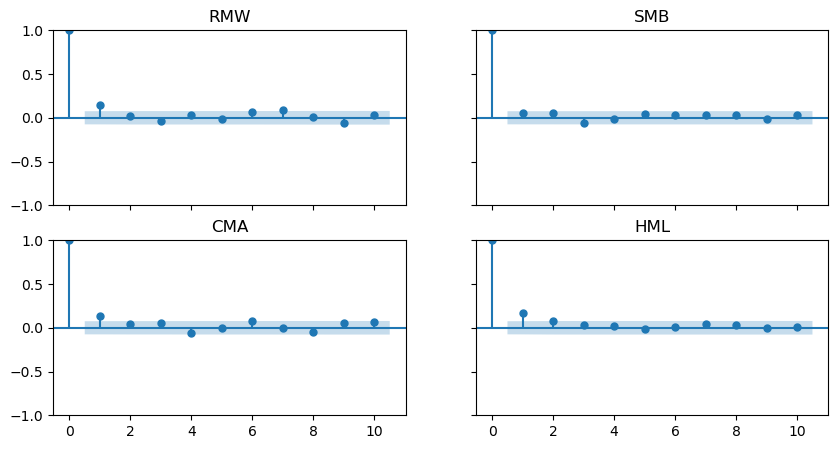

In [24]:
fig, ax=plt.subplots(2,2,figsize=(10,5),sharex='all',sharey='all')
sm.graphics.tsa.plot_acf(FF_factors.RMW,lags=10,ax=ax[0,0],title='RMW')
sm.graphics.tsa.plot_acf(FF_factors.CMA,lags=10,ax=ax[1,0],title='CMA')
sm.graphics.tsa.plot_acf(FF_factors.SMB,lags=10,ax=ax[0,1],title='SMB')
sm.graphics.tsa.plot_acf(FF_factors.HML,lags=10,ax=ax[1,1],title='HML')
plt.show()

=> 사이즈 팩터(SMB)만 첫 번째 차수에서 유의미한 자기 상관관계가 없음

# 3.5 머신러닝과의 연결 고리
- 머신러닝의 목표: 고전적 데이터 ~ 감정과 같은 대체 데이터까지 모두 의미
- 머신러닝 도구:
$\\max_{\theta_T}E_T[u(r_{p,T+1})]=max_{\theta_T}E_T[u((\overline{w}_T+x_T\theta_T)'r_{T+1})]\ $ : 벤치마크 + 특성들의 선형함수(벤치마크로부터 편차)
$\\max_{\theta_T}\frac{\tau}\sum^{T-1}_{t=T-\tau}u(\sum^{N_T}_{i=1}(\overline{w}_{i,t}+\theta'_Tx_{i,t})r_{i,t+1})$

# 3.6 코딩 예제

Text(0.5, 0, 'year')

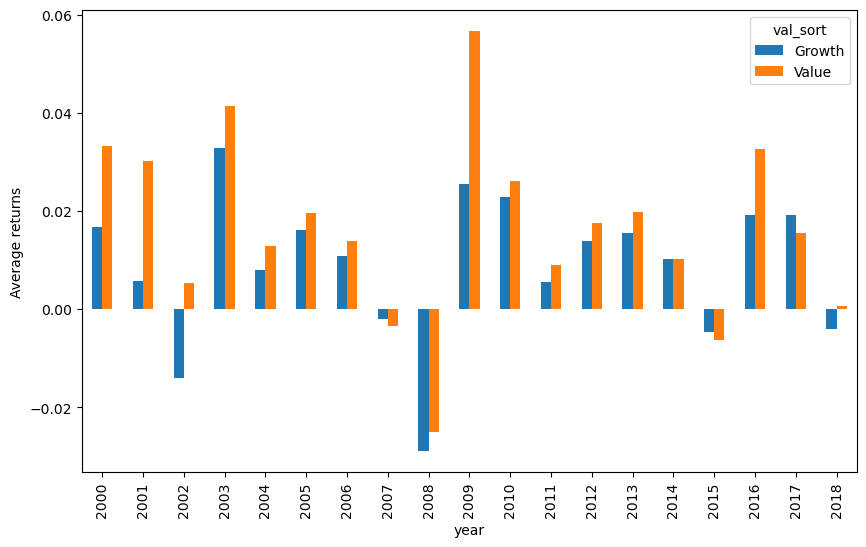

In [31]:
# 1. 성장주 vs 가치주 포트폴리오의 연간 수익률]
from Ch1 import data_ml
df_median=[]
df=[]
# 각 날짜별 중위값 계산
df_median=data_ml[['date','Pb']].groupby(['date']).median().reset_index()
df_median.rename(columns={'Pb':'Pb_median'},inplace=True)
# 연도 및 시가 총액 로직 설정해 그룹화
df=pd.merge(data_ml[['date','Pb','R1M_Usd']],df_median,how='left',on='date')
df['date']=pd.to_datetime(df['date'], format='%Y-%m-%d')
df=df.groupby([df['date'].dt.year.rename('year'), np.where(df['Pb']>df['Pb_median'],"Growth","Value")]).mean().reset_index()
df.rename(columns={'level_1':'val_sort'},inplace=True)
df.pivot(index='year',columns='val_sort',values='R1M_Usd').plot.bar(figsize=(10,6))
plt.ylabel('Average returns')
plt.xlabel('year')


Text(0.5, 0, 'year')

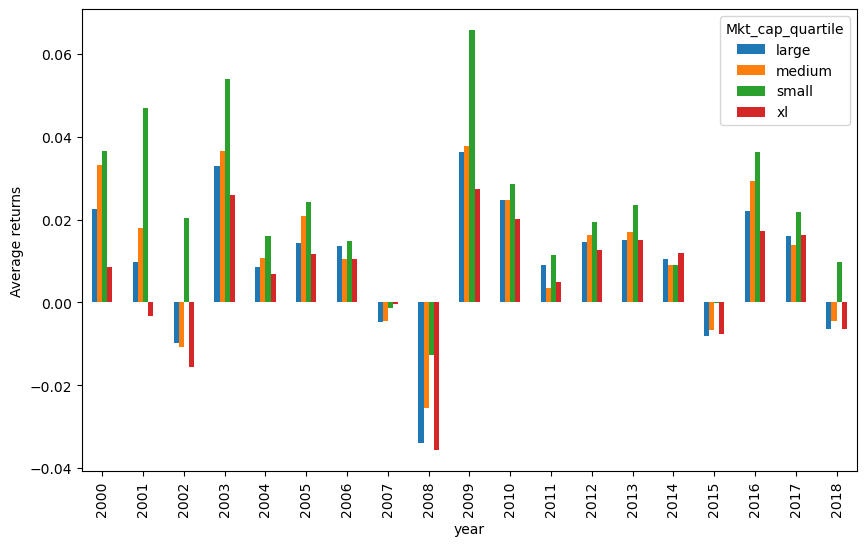

In [38]:
# 3. 시가 총액의 사분위수 기준으로 정렬된 포트폴리오 연간 수익률 계산
df=[]
values=['small','medium','large','xl']
conditions=[data_ml['Mkt_Cap_6M_Usd']<=0.25,
            (data_ml['Mkt_Cap_6M_Usd']>0.25) & (data_ml['Mkt_Cap_6M_Usd']<=0.50),
            (data_ml['Mkt_Cap_6M_Usd']>0.50) & (data_ml['Mkt_Cap_6M_Usd']<=0.75),
            data_ml['Mkt_Cap_6M_Usd']>0.75
            ]
df=data_ml[['date','R1M_Usd','Mkt_Cap_6M_Usd']].copy()
df['Mkt_cap_quartile']=np.select(conditions,values,default='')
df['year']=pd.to_datetime(df['date'],format='%Y-%m-%d').dt.year
# 평균 수익률 계산
df=df.groupby(['year','Mkt_cap_quartile'])['R1M_Usd'].mean().unstack()
df.loc[:,['large','medium','small','xl']].plot.bar(figsize=(10,6))
plt.ylabel('Average returns')
plt.xlabel('year')